# UTS DATA MINING

LELY INDRIYANI/4101422099

In [1]:
from google.colab import files
import pandas as pd
import io

# Upload file dari komputer
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Load the file into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))  # Assuming it's a CSV

from google.colab import data_table

# Menampilkan dataset dalam tabel interaktif
data_table.DataTable(df)


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 1. EKSPLORASI AWAL

a. Berapa jumlah total penumpang dalam data?

In [3]:
import pandas as pd

# The 'df' DataFrame from the previous cell is already available
print("Jumlah total penumpang:", len(df))


Jumlah total penumpang: 891


Jumlah total penumpang  dalam daya ada 891

b. Berapa jumlah penumpang yang selamat dan tidak selamat? Tampilkan dalam bentuk tabel dan grafik.

col_0     Jumlah
Survived        
0            549
1            342


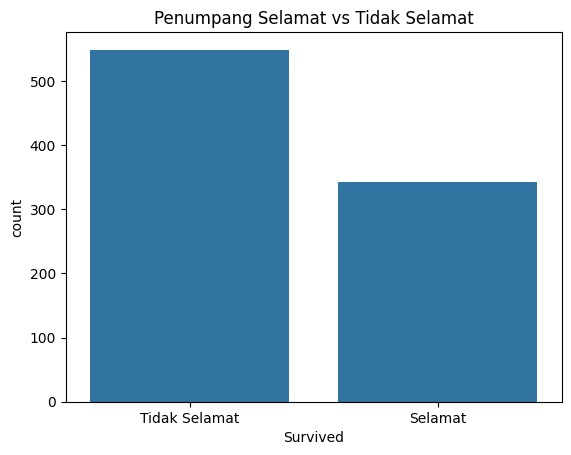

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tabel
print(pd.crosstab(index=df['Survived'], columns='Jumlah'))

# Grafik
sns.countplot(data=df, x='Survived')
plt.title('Penumpang Selamat vs Tidak Selamat')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])
plt.show()


 Jumlah penumpang yang selamat adalah 342 dan jumlah penumpang tidak selamat adalah 549

c. Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua?

In [6]:
from IPython.display import display

# Rata-rata umur
print("Rata-rata umur:", df['Age'].mean())

# Umur termuda dan tertua
min_age = df['Age'].min()
max_age = df['Age'].max()

print("\nPenumpang termuda (umur =", min_age, "):")
termuda = df[df['Age'] == min_age][['Name', 'Sex', 'Age', 'Pclass']]
display(termuda)

print("\nPenumpang tertua (umur =", max_age, "):")
tertua = df[df['Age'] == max_age][['Name', 'Sex', 'Age', 'Pclass']]
display(tertua)



Rata-rata umur: 29.69911764705882

Penumpang termuda (umur = 0.42 ):


,Name,Sex,Age,Pclass
803,"Thomas, Master. Assad Alexander",male,0.42,3



Penumpang tertua (umur = 80.0 ):


,Name,Sex,Age,Pclass
630,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,1


- Rata-rata umur penumpang adalah 29.69911764705882.
- Penumpang termuda adalah Thomas, Master. Assad Alexander dengan umur 0,42
- penumpang tertua adalah Barkworth, Mr. Algernon Henry Wilson dengan umur 80


d. Berapa jumlah penumpang berdasrakan jenis kelamin? Siapa yang paling banyak? Visualisasikan

Jumlah berdasarkan jenis kelamin:
 Sex
male      577
female    314
Name: count, dtype: int64


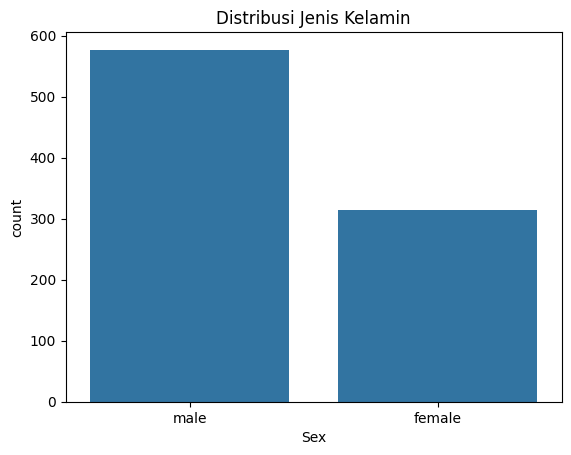

In [7]:
print("Jumlah berdasarkan jenis kelamin:\n", df['Sex'].value_counts())

sns.countplot(data=df, x='Sex')
plt.title('Distribusi Jenis Kelamin')
plt.show()


- Jumlah penumpang laki-laki adalah 577
- Jumlah penumpang wanita adalah 314


e. Tampilkan jumlah penumpang berdasarkan kelas (Pelass) das berapa persen deri sotal data yang berada di kelas 1? Visualisasikan


Jumlah per kelas:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Persentase penumpang kelas 1: 24.24%


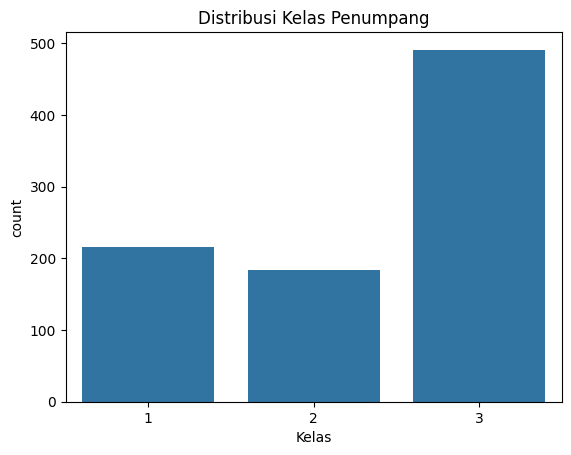

In [8]:
pclass_counts = df['Pclass'].value_counts()
print("Jumlah per kelas:\n", pclass_counts)
percent_class1 = pclass_counts[1] / len(df) * 100
print(f"Persentase penumpang kelas 1: {percent_class1:.2f}%")

sns.countplot(data=df, x='Pclass')
plt.title('Distribusi Kelas Penumpang')
plt.xlabel('Kelas')
plt.show()


- Jumlah penumpang kelas 1 adalah 216
- Jumlah penumpang kelas 2 adalah 184
- Jumlah penumpang kelas 3 adalah 491
- Presentase jumlah penumpang kelas 1 adalah 24,24%

# 2. PREPROCESSING

a. Apakah terdapat missing value pada data tersebut?


In [9]:
print("Missing value di setiap kolom:\n", df.isnull().sum())


Missing value di setiap kolom:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Terdapat missing value di kolom:

- Age sebanyak 177
- Cabin sebanyak 687
- Embarked sebanyak 2

b. Jika ya, apa yang anda lakukan?


In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns='Cabin', inplace=True)


<ipython-input-10-51cc9d8627a6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-10-51cc9d8627a6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Missing values ditangani dengan cara mengisi kolom 'Age' menggunakan nilai median, kolom 'Embarked' dengan modus, dan menghapus kolom 'Cabin' karena memiliki terlalu banyak nilai yang hilang. Pendekatan ini memastikan bahwa dataset siap digunakan tanpa masalah terkait missing values.

c. Apakah terdapat outlier pada data tersebut? Jelaskan apa itu outliert


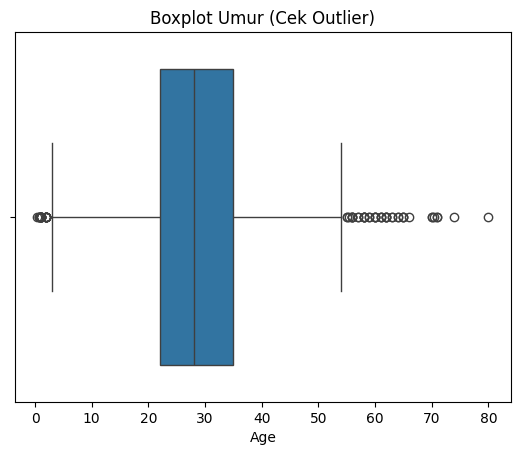


Outlier adalah data yang sangat jauh dari nilai lainnya.
Outlier bisa mempengaruhi model, tergantung konteksnya.



In [11]:
sns.boxplot(x=df['Age'])
plt.title("Boxplot Umur (Cek Outlier)")
plt.show()

print("""
Outlier adalah data yang sangat jauh dari nilai lainnya.
Outlier bisa mempengaruhi model, tergantung konteksnya.
""")


d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?


In [12]:
# Opsional - hanya jika memang mengganggu
df = df[df['Age'] < 70]  # Contoh: buang data dengan umur ekstrem


Dikarenakan outlier tidak mengganggu, maka tidak perlu diatasi

e. Jika dibutuhkan silakan lakukan transformasi/standarisasi/scalling terhadap data tersebut?


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


<ipython-input-13-ec63e3820305>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


# 3. MODELLING






a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut


In [14]:
from sklearn.model_selection import train_test_split

# Encoding
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Fitur dan target
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-14-504eeeb99796>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


Proses pembagian data menjadi training dan testing melibatkan penggunaan fungsi seperti train_test_split dari scikit-learn untuk memisahkan dataset yang terdiri dari fitur (X) dan target (y) ke dalam dua subset yang berbeda. Subset training digunakan untuk melatih model machine learning, sementara subset testing yang tidak dilihat model selama pelatihan digunakan untuk mengevaluasi kinerja model secara objektif pada data baru, sehingga memberikan perkiraan yang lebih realistis tentang kemampuan generalisasi model dan membantu mengidentifikasi potensi overfitting yang terjadi ketika model terlalu baik dalam mempelajari data training namun buruk dalam memprediksi data yang belum pernah dilihat sebelumnya.

Pembagian data menjadi training dan testing adalah praktik penting untuk membangun model machine learning yang handal dan mampu melakukan prediksi yang akurat pada data baru. Ini membantu kita menghindari overfitting dan mendapatkan evaluasi kinerja yang lebih objektif.

b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tericbut?



Pembagian data menjadi 80% untuk pelatihan dan 20% untuk pengujian bertujuan agar model memiliki data yang memadai untuk belajar pola yang relevan sekaligus memastikan evaluasi kinerjanya dilakukan secara objektif menggunakan data yang belum pernah dilihat sebelumnya.

c. Buatlah model klasifikasi dari 3 algortima yang berbeda Jelaskan masing-masing model dan cara kerjanya



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} selesai dilatih.")


Logistic Regression selesai dilatih.
Random Forest selesai dilatih.
KNN selesai dilatih.


- Regresi Logistik adalah algoritma yang dipakai dalam pemodelan regresi logistik. Algoritma ini bekerja dengan asumsi adanya hubungan linear antara fitur-fitur yang ada dengan probabilitas kelas target. Metode ini populer untuk tugas klasifikasi biner, contohnya memprediksi apakah sesuatu akan "selamat" atau "tidak selamat".

- Sementara itu, Random Forest adalah model yang memanfaatkan banyak pohon keputusan. Prediksi yang dihasilkan oleh model ini didasarkan pada hasil voting terbanyak dari semua pohon keputusan tersebut. Keunggulan Random Forest adalah fleksibilitasnya dalam menangani data yang tidak memiliki pola linear dan kemampuannya dalam mengurangi risiko overfitting.

- K-Nearest Neighbors (KNN) adalah algoritma klasifikasi yang bekerja berdasarkan prinsip kedekatan antar data. KNN mengidentifikasi sejumlah k tetangga terdekat dalam ruang fitur untuk suatu titik data baru, lalu menetapkan label kelas berdasarkan label kelas mayoritas dari tetangga-tetangga tersebut.

d. Berapa nilai evaluasi dari masing-masing model pada data uji? Apa arti dari masing-masing metrik evaluasi tersebut?


In [17]:
from sklearn.metrics import classification_report, accuracy_score

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Logistic Regression
Akurasi: 0.7796610169491526
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       105
           1       0.73      0.74      0.73        72

    accuracy                           0.78       177
   macro avg       0.77      0.77      0.77       177
weighted avg       0.78      0.78      0.78       177


Random Forest
Akurasi: 0.7966101694915254
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.75      0.75      0.75        72

    accuracy                           0.80       177
   macro avg       0.79      0.79      0.79       177
weighted avg       0.80      0.80      0.80       177


KNN
Akurasi: 0.8361581920903954
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.80      0.79      0.80        72

    accuracy                           0.84       177
   

Untuk mengukur seberapa baik ketiga model klasifikasi (Regresi Logistik, Random Forest, dan K-Nearest Neighbors) dalam memprediksi keselamatan penumpang Titanic, kita menggunakan data uji. Proses evaluasi ini melibatkan perhitungan beberapa metrik penting, yaitu akurasi, presisi, recall, dan F1-score.

Berikut penjelasan ringkas mengenai setiap metrik:

* Akurasi (Accuracy): Mengukur seberapa tepat model secara keseluruhan dalam membuat prediksi, yaitu persentase prediksi yang tepat dari seluruh total prediksi.
* Presisi (Precision): Mengukur dari semua penumpang yang diprediksi selamat, berapa proporsi yang sebenarnya selamat.
* Recall: Mengukur dari semua penumpang yang sebenarnya selamat, berapa proporsi yang berhasil diprediksi sebagai selamat oleh model.
* F1-score: Merupakan nilai rata-rata harmonik antara presisi dan recall. Metrik ini memberikan gambaran yang lebih seimbang mengenai kinerja model, terutama ketika terdapat ketidakseimbangan jumlah kelas.

e. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi dataset anda dengan baik


<ipython-input-24-5cefeef5d9f7>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
<ipython-input-24-5cefeef5d9f7>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
<ipython-input-24-5cefeef5d9f7>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
<ipython-input-24-5cefeef5d9f7>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

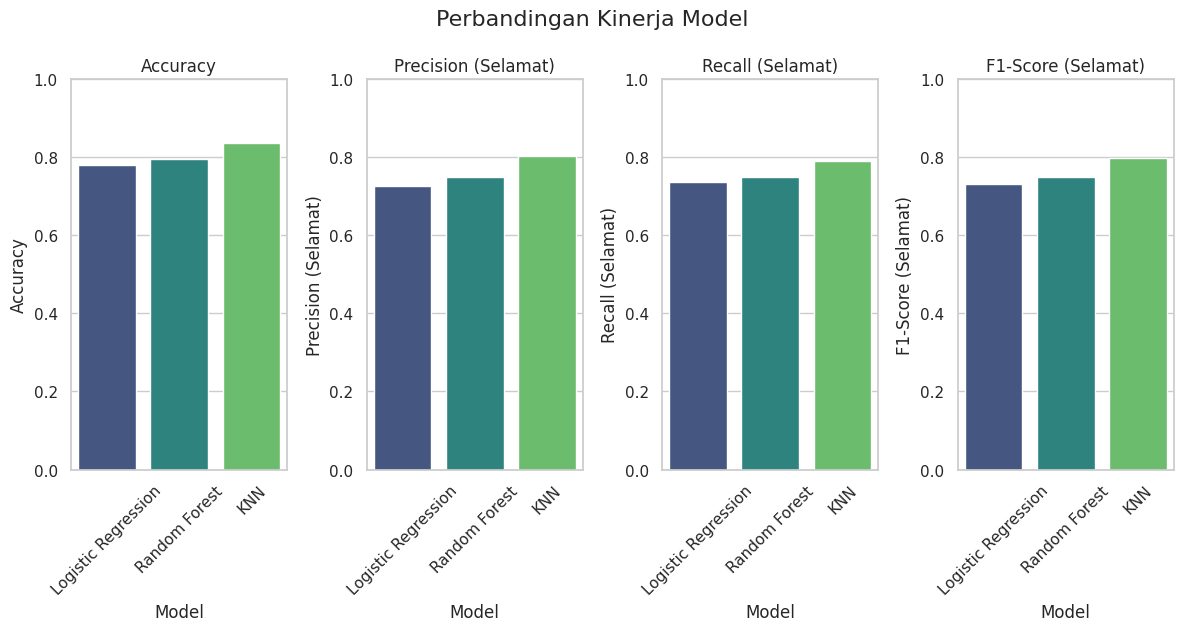

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score


# Dictionary to store the results
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append results to the list
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision (Selamat)': report['1']['precision'],
        'Recall (Selamat)': report['1']['recall'],
        'F1-Score (Selamat)': report['1']['f1-score']
    })

# Create a pandas DataFrame from the results
results_df = pd.DataFrame(results)


# Set style
sns.set(style="whitegrid")

# Plot bar chart for each metric
metrics = ['Accuracy', 'Precision (Selamat)', 'Recall (Selamat)', 'F1-Score (Selamat)']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    plt.subplot(1, 4, i + 1)
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(metric)
    plt.ylim(0, 1)  # All metrics between 0 and 1

plt.tight_layout()
plt.suptitle("Perbandingan Kinerja Model", fontsize=16, y=1.05)
plt.show()

Setelah menguji tiga model berbeda (Logistic Regression, Random Forest, dan KNN), hasilnya menunjukkan bahwa model Random Forest memberikan performa terbaik untuk dataset Titanic. Keunggulannya terletak pada kemampuannya untuk menangkap pola-pola kompleks dalam data, serta ketidaksensitifannya terhadap variasi skala atau distribusi data, yang membedakannya dengan KNN atau Logistic Regression.

# 4. EVALUASI MODEL TERBAIK

a. Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang "selamat"?


In [19]:
from sklearn.metrics import classification_report

# Contoh model terbaik: Random Forest
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
print("Precision (selamat):", report['1']['precision'])
print("Recall (selamat):", report['1']['recall'])


Precision (selamat): 0.7361111111111112
Recall (selamat): 0.7361111111111112


b. Berapa banyak penumpang yang diprediksi selamat, dan berapa di antaranya benar-benar selamat?

In [20]:
predicted_selamat = (y_pred == 1).sum()
benar_selamat = ((y_pred == 1) & (y_test == 1)).sum()
print("Jumlah penumpang diprediksi selamat:", predicted_selamat)
print("Jumlah yang benar-benar selamat:", benar_selamat)


Jumlah penumpang diprediksi selamat: 72
Jumlah yang benar-benar selamat: 53
